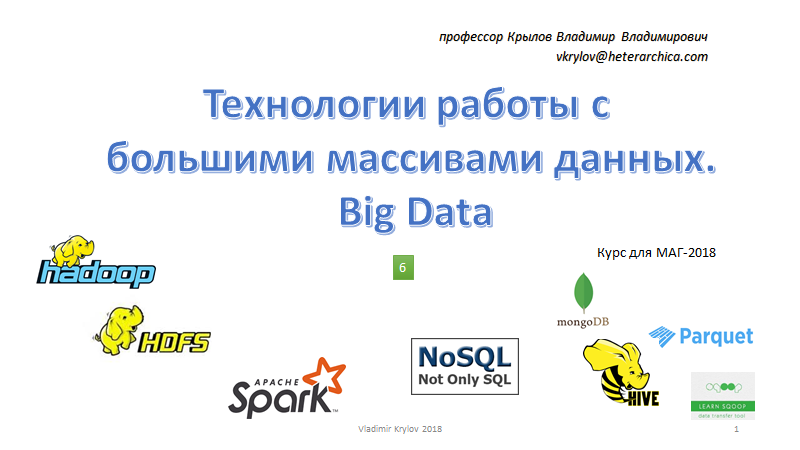

# SparkX - библиотека работы с большими графами

Apache Spark - это распределенная вычислительная система, популярность которой растет за счет ее скорости. GraphX ​​- это Spark, применяемый к графам, здесь описывается, как GraphX ​​вписывается в рабочий процесс обработки данных. Также вы фактически получите в руки PageRank, алгоритм, который запустил Google.

Apache Spark - это альтернатива обработки больших данных, которая почти полностью вытеснила Hadoop, платформу обработки данных с открытым исходным кодом, открывшую эру больших данных. Легко масштабируясь на кластеры из сотен узлов, обработка данных в памяти Spark часто может превзойти Hadoop во много раз.

GraphX ​​- это слой обработки графов в верхней части Spark, который обеспечивает мощь обработки больших данных для графов которые были бы слишком большими для размещения на одной машине. Люди давно начали использовать Spark для графов, в том числе с предшествующим модулем Bagel, но теперь у GraphX ​​есть стандартизированный способ сделать это, и он также предоставляет библиотеку полезных алгоритмов.

Вот несколько причин, по которым вы можете использовать Spark GraphX:

- У вас уже есть конвейеры обработки данных Spark и вы хотите включить обработку графов.
- Вы любопытны на счет мощности Spark и / или GraphX.
- Вы среди тех, для кого важны графовые данные.
- Данные вашего графа слишком велики для размещения на одном компьютере.
- Либо вам не нужно, чтобы несколько приложений обращались к одному и тому же хранилищу данных, либо вы планируете добавить REST-сервер в Spark; например, с надстройкой, изначально разработанной Ooyala, под названием Spark Job Server.
- Либо вам не нужны транзакции типа базы данных, либо вы планируете использовать базу данных графов, такую ​​как Neo4j или Titan, в сочетании с GraphX.
- У вас уже есть кластер Spark, доступный для вашего приложения.

 Как и Hadoop, Spark работает на кластере аппаратного оборудования. Ключевая абстракция в Spark - это эластичный распределенный набор данных (RDD). СДР создаются приложением Spark (находящимся в драйвере Spark) через диспетчер кластеров, как показано 
 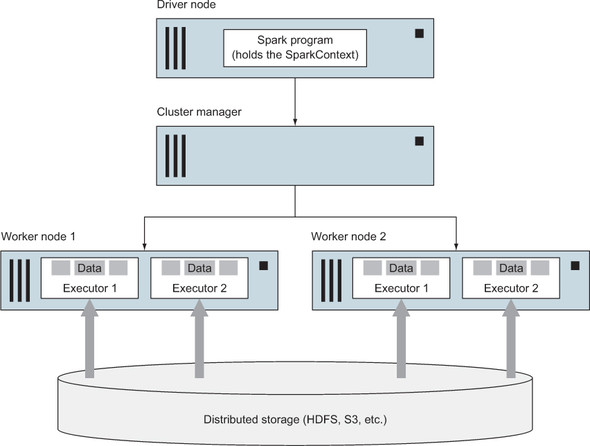

На сегодняшний день одним из наиболее распространенных способов использования графов является добыча данных в социальных сетях, в частности, для определения клики, для рекомендации новых подключений, а также для предложения продуктов и рекламы. Такие данные могут быть большими - больше, чем могут быть сохранены на одной машине - вот где приходит Spark: он хранит данные на нескольких машинах, участвующих в кластере.

Spark хорошо подходит для обработки графовых данных по другой причине: он хранит данные в памяти (RAM) каждого компьютера в кластере, в отличие от Hadoop, который хранит данные на диске каждого компьютера в кластере. В то время как Hadoop может обрабатывать последовательный доступ к данным, Spark может обрабатывать произвольный порядок доступа, необходимый для системы графов, которая должна перемещаться по графам от одной вершины к другой.

GraphX ​​не является базой данных. Вместо этого это система обработки графов, которая полезна, например, для отправки запросов веб-службы или выполнения одноразовых, длительных автономных вычислений. Поскольку GraphX ​​не является базой данных, он не обрабатывает обновления и удаления, такие как Neo4j и Titan, которые являются графическими базами данных. Apache Giraph являетсяеще один пример системы обработки графов, но Giraph ограничен медленной Hadoop Map / Reduce. GraphX, Giraph и GraphLab - это отдельные реализации идей, изложенных в статье Google Pregel. Такие системы обработки графиков оптимизированы для выполнения алгоритмов на всем графе в широком параллельном режиме, в отличие от работы с небольшими частями графиков, такими как базы данных графов. Чтобы провести сравнение с миром стандартных реляционных баз данных, графовые базы данных, такие как Neo4j, похожи на OLTP (онлайн-обработка транзакций), тогда как системы обработки графов, такие как GraphX, похожи на OLAP (онлайн-аналитическая обработка).

Графы могут хранить различные виды данных: геопространственные, социальные сети, сети цитирования на бумаге и, конечно, ссылки на веб-страницы.

In [1]:
!pip install psutil

In [2]:
import psutil
psutil.cpu_count()

8

In [3]:
!pip install pyspark

In [4]:
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SparkSession
import time
import pandas as pd
from pyspark.sql import SparkSession
import pandas as pd

conf = SparkConf()
conf.set('spark.jars.packages','graphframes:graphframes:0.3.0-spark2.0-s_2.11')

In [5]:
print(conf.toDebugString())

spark.jars.packages=graphframes:graphframes:0.3.0-spark2.0-s_2.11


In [6]:
from pyspark.sql import *
from pyspark.sql.functions import udf

In [7]:
conf.setAppName('TheFirstTestingApp')
#conf.setMaster('spark://dell-inspiron:7077') # if master is started using command line
conf.setMaster('local[*]')
from pyspark import SparkContext
sc=SparkContext.getOrCreate(conf=conf) #Start the spark context
spark = SparkSession.builder.appName('notebook').getOrCreate()

In [8]:
!pip install graphframes

In [9]:
from graphframes import *
import hashlib

GraphX ​​реализует понятие, называемое графом свойств . Как показано на рисунке 1.9 , вершины и ребра могут иметь произвольные наборы атрибутов, связанных с ними. Атрибутом может быть что-то такое же простое, как возраст человека, или что-то такое же сложное, как документ XML, изображение или видео.

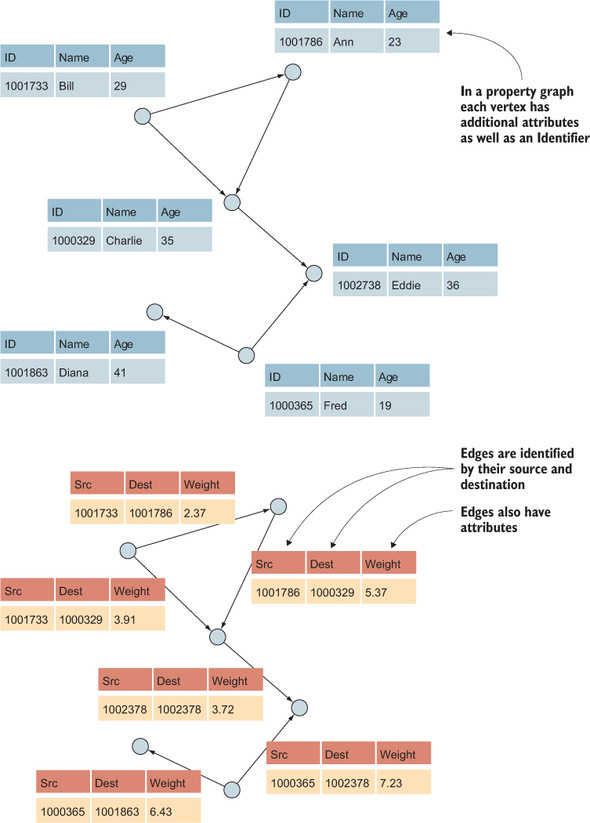

Если у нас есть слишком большой граф, чтобы поместиться в памяти одного компьютера, Spark позволяет разделить его между несколькими компьютерами в кластере компьютеров. Но как лучше разбить граф?

Наивный способ и способ, которым это было сделано в течение многих лет, состоял в том, чтобы назначить разные вершины различным компьютерам в кластере. Но это привело к вычислительным узким местам, потому что графы реального мира всегда, кажется, имеют некоторые вершины чрезвычайно высокой степени. Степени вершин графов реального мира имеют тенденцию следовать степенному закону.

Система обработки графов использует разрез вершин , который равномерно распределяет ребра между машинами / узлами, более равномерно распределяет данные по кластеру. Эта идея возникла в результате исследований в 2005 году, была популяризирована системой обработки графов GraphLab (теперь называемой PowerGraph) и была принята GraphX ​​в качестве схемы разделения по умолчанию.

GraphX ​​поддерживает четыре разные схемы разбиения ребер. GraphX ​​разбивает вершины независимо от ребер. Избегая укладки всех ребер из вершины высокой степени на одну машину, GraphX ​​избегает дисбаланса нагрузки, который испытывали более ранние системы обработки графов и базы данных графов.
Как мы уже видели, GraphX ​​хранит ребра графа в одной таблице, а вершины - в другой. Это позволяет графическим алгоритмам, реализованным в GraphX, эффективно перемещаться по графам в виде графов, вдоль ребер от одной вершины к другой или в виде таблиц ребер или вершин (см. Рисунок 1.11 ). Этот последний режим доступа позволяет эффективно выполнять массовые преобразования данных ребер или вершин.
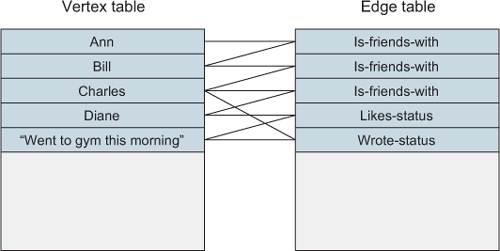

In [10]:
# This dataset is already filtered to include only links between TLDs, not within TLDs. 
# I also filtered out common sites and resources for a cleaner sample graph.
raw_data = spark.read.parquet("dataset/*.snappy.parquet")
raw_data.count()

AnalysisException: 'Path does not exist: file:/G:/HSE/ML/IAD19_ML/Spark_Krylov/dataset/*.snappy.parquet;'

In [ ]:
# Rename columns to something decent. 
df = raw_data.withColumnRenamed("_c0", "parent")\
.withColumnRenamed("_c1", "parentTLD")\
.withColumnRenamed("_c2", "childTLD")\
.withColumnRenamed("_c3", "child")\
.filter("parentTLD is not null and childTLD is not null")

In [ ]:
df.show(5)

In [ ]:
# Select set of parents and children TLDs (your nodes) to assign id for each node.

aggcodes = df.select("parentTLD","childTLD").rdd.flatMap(lambda x: x).distinct()
aggcodes.count()

In [ ]:
def hashnode(x):
    return hashlib.sha1(x.encode("UTF-8")).hexdigest()[:8]

hashnode_udf = udf(hashnode)

In [ ]:
vertices = aggcodes.map(lambda x: (hashnode(x), x)).toDF(["id","name"])

vertices.show(5)

In [ ]:
edges = df.select("parentTLD","childTLD")\
.withColumn("src", hashnode_udf("parentTLD"))\
.withColumn("dst", hashnode_udf("childTLD"))\
.select("src","dst")

edges.show(5)

GraphX ​​по своей сути является системой пакетной обработки. Например, он не интегрируется с Spark Streaming (по крайней мере, не прямым способом). Не существует единственного способа использовать GraphX. Существует множество различных потоков данных для пакетной обработки, в которые может вписаться GraphX, и потоки данных на рисунках ниже охватывают некоторые из них.
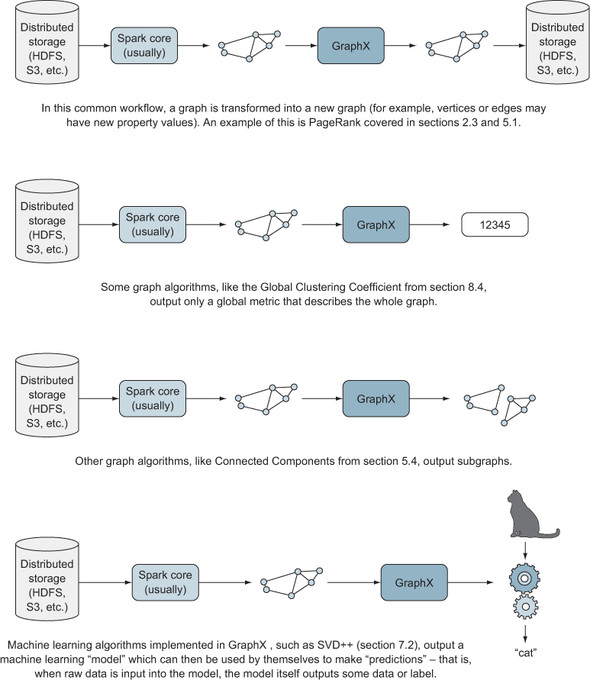

Посмотрим как выглядят конвейеры, связанные с использованием MLlib, компонента машинного обучения Spark. Пара алгоритмов использует GraphX ​​за кулисами, но GraphX ​​также может использоваться вместе с любым алгоритмом MLlib.

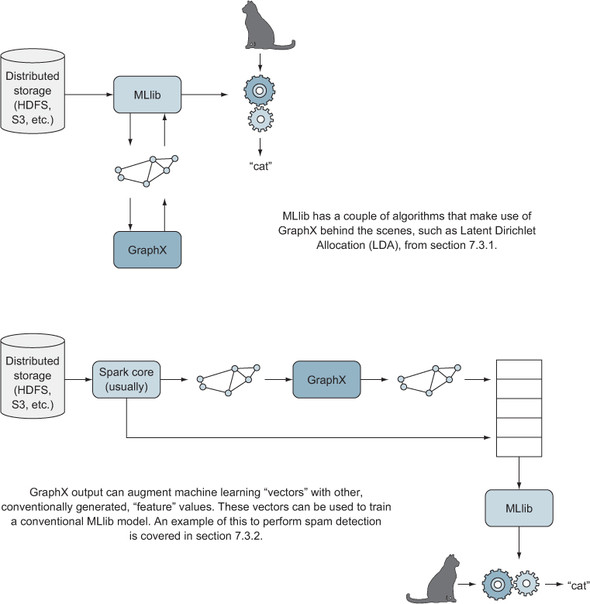

Графовые системы можно разделить на две широкие категории: системы обработки графов и базы данных графов. Многие из них основаны на памяти, а некоторые даже поддерживают кластерные вычисления. Spark GraphX ​​- это система обработки графов, а не база данных графов. 

In [ ]:
# create GraphFrame
graph = GraphFrame(vertices, edges)

In [ ]:
graph

In [ ]:
# Count nodes by number of in-degrees

graph.inDegrees.join(vertices, on="id")\
.orderBy("inDegree", ascending=False).show(10)

In [ ]:
results = graph.pageRank(resetProbability=0.01, maxIter=20)
results.vertices.select("id", "pagerank")\
.join(vertices, on="id").orderBy("pagerank", ascending=False)\
.show(10)

In [ ]:
# Run LPA
communities = graph.labelPropagation(maxIter=5)

In [ ]:
communities.persist().show(10)

In [ ]:
print (f"There are {communities.select('label').distinct().count()} communities in sample graph.")

In [ ]:
communities.select('label').distinct()